## Project :- On the bases of symtoms whether a person fall in category of diabates or not using Decision Tree Classifier

use bagging classifier to improve the performance of the algorithm

In [1]:
# Importing all the neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading the data
df = pd.read_csv("C:/Users/Vaibhav/Desktop/ml data set/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
# Storing the feature names in a variable
feature = df.columns[:-1]
print(feature)

# Target categories 
target = df["Outcome"].unique().astype(str)
print(target)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
['1' '0']


In [8]:
# Data preprocessing :-
# dividing the Independent and dependent variable into "x" and "y" variable
# x--> Independent variable (Pregnancies ,Glucose, BloodPressure ,SkinThickness,Insulin,BMI, DiabetesPedigreeFunction, Age)
# y --> Dependent variable (Outcome)
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [9]:
# Spliting the traing and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)


In [45]:
# Scale the traing and testing data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_test[0:5,:])

[[-0.8391623   2.40454892  0.32567665  1.37168273 -0.71652335  1.326132
   2.7617022  -0.97315788]
 [-0.54520916 -0.45149606  0.22283139  0.55997491  0.12742524  0.16754413
  -0.20149854 -0.88977097]
 [ 0.0426971  -1.41385904 -0.39424016 -1.31319697 -0.71652335  0.21737587
  -0.24040926 -0.72299714]
 [ 0.33665024  1.38009801  0.11998613 -0.12685478  0.76038668 -0.80417472
   0.34624463  1.44506259]
 [-1.13311543 -0.32732019 -0.23997227 -1.31319697 -0.71652335 -0.95366993
   0.56474327 -0.22267567]]


In [46]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Now it's time to select out best attribute for root node
# here we defined the decision tree classifier
clf_entropy = DecisionTreeClassifier(criterion = "entropy",random_state = 0, max_depth = 3) # max_depth --> no. of divison

# perform training 
# our data is already prepocessed that's why we don't did transform 
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [47]:
# Test our model with testing data and predict the values
y_pred = clf_entropy.predict(x_test)
print("predicted target")
print(y_pred)

predicted target
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]


In [48]:
# build a confusion matrix to know the accuracy 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("confusion matrix : \n", confusion_matrix(y_test,y_pred))

print("Accuracy : \n", accuracy_score(y_test,y_pred)*100,"%")

print("report : \n", classification_report(y_test,y_pred))

confusion matrix : 
 [[145  12]
 [ 50  24]]
Accuracy : 
 73.16017316017316 %
report : 
               precision    recall  f1-score   support

           0       0.74      0.92      0.82       157
           1       0.67      0.32      0.44        74

    accuracy                           0.73       231
   macro avg       0.71      0.62      0.63       231
weighted avg       0.72      0.73      0.70       231



In [49]:
# predict on random state 
x_rand = [[6.4,1.8,6.6,2.1,9,5,8,2]]
y_pred1 = clf_entropy.predict(x_rand)
print(y_pred1)

[1]


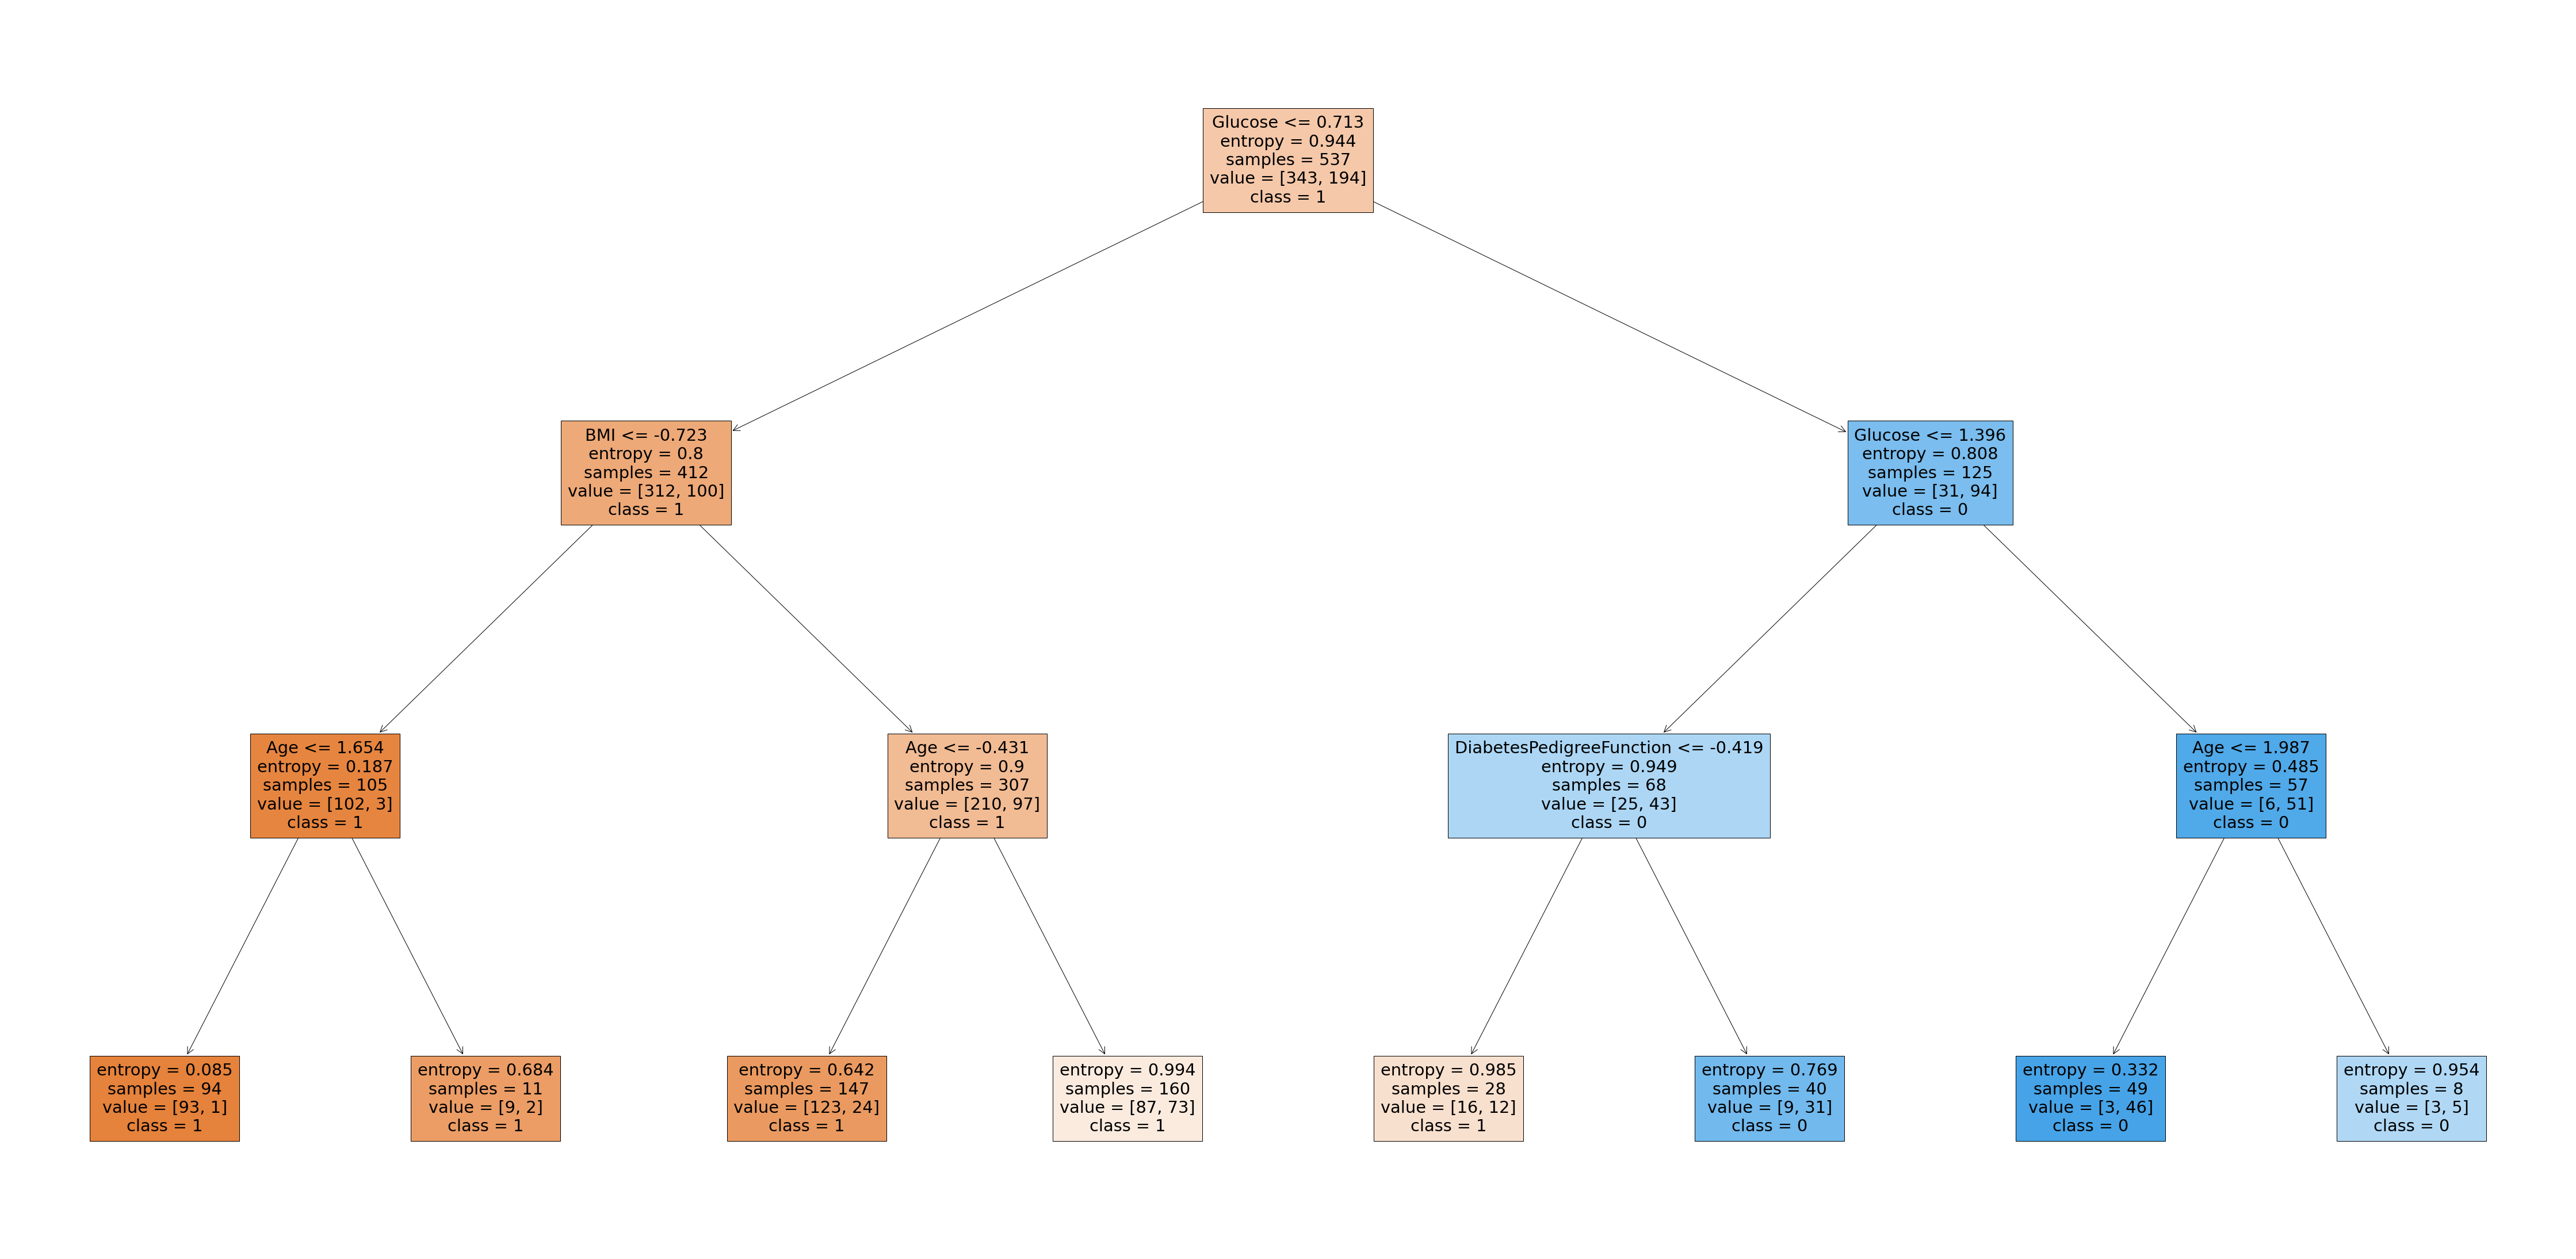

In [50]:
# Let's plot our decision tree
from sklearn import tree
fig = plt.figure(figsize = (80,40))
a = tree.plot_tree(clf_entropy,feature_names = feature,class_names = target,filled = True)

In [51]:
# bagging 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier(random_state = 5)

#fitting the model
tree = tree.fit(x_train,y_train)

# A bagging parameters
# 1. base_estimator object, default = None
# the base estimator to fit on random subsets of the datasets. if None, then the as is a decisiontreeclassifier
# 2. n_estimate int, default = 10


bag = BaggingClassifier(base_estimator = tree , n_estimators = 500 , random_state = 5)
bag = bag.fit(x_train,y_train)

# predicting the test set
y_pred2 = bag.predict(x_test)
# Most important code 
# base_estimater = which algo you want to 

In [52]:
# test the accuracy of model after bagging
bag_test = round(accuracy_score(y_test,y_pred2),2)*100
print(bag_test)

80.0
